# Introdução ao Cantera
## Cursos de Verão IFMG-Arcos 2023
### Rotinas computacionais aplicadas às Ciências Térmicas - GESESC
#### Autor: *Reginaldo Gonçalves Leão Junior*

O Cantera é uma suíte computacional para problemas de termodinâmica, termoquímica e processos de transporte.
Diferentemente do CoolProp que trata apenas transformações físicas, o Cantera pode lidar com processos termodinâmicos nos quais ocorrem também tranformações 
químicas. Devido a isso ele utiliza para seu funcionamento bases de dados denominadas **Mecanismos de Reação**, arquivos que contém as propriedades cinéticas e termodinâmicas de uma determinada série de compostos e reações. 

Um dos mecanismos de reação mais utilizados no mundo é o GRIMECH3.0 um mecanismo especialmente desenvolvido para o estudo de processos termoquímicos envolvendo 
cadeias carbônicas de massa molar baixa, muito especialmente o metano.

A importação do Cantera geralmente é feita da seguinte forma. 

In [1]:
import cantera as ct

Após a importação geralmente cria-se um modelo computacional de gás indicando o mecanismo de reação a ser utilizado. 

In [2]:
gas1 = ct.Solution('gri30.yaml')

As propriedades iniciais do gás podem ser inpecionadas fazendo-se:

In [3]:
gas1()


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             26469             53361  J
   internal energy       -1.2108e+06        -2.441e+06  J
           entropy             64910        1.3086e+05  J/K
    Gibbs function       -1.9447e+07       -3.9204e+07  J
 heat capacity c_p             14311             28851  J/K
 heat capacity c_v             10187             20536  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.717
     [  +52 minor]                 0                 0  



Observe sua composição, ele possui $H_2$, mas pode representar até outras 52 espécies.
Para mudar as propriedades termodiâmicas do gás você pode passar pares de valores para cada uma das propriedades da seguinte forma. 

In [4]:
gas1.TP = 1200, 101325  # Temperatura e pressão

In [5]:
gas1.TD = 1200, 0.0204723 # Temperatura e densidade

In [6]:
gas1.HP = 1.32956e7, 101325 # Entalpia específica e densidade

In [7]:
gas1.UV = 18.34619e6, 1/0.0204723 # Energia interna específica e volume específico

In [8]:
gas1.SP = 85227.6, 101325 # Entropia específica e pressão

In [9]:
gas1.SV = 85227.6, 1/0.0204723 #Entropia específica e volume específico

Inspecionando as novas propriedades termodinâmicas

In [10]:
gas1()


  gri30:

       temperature   1200.5 K
          pressure   1.0136e+05 Pa
           density   0.020472 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        1.3303e+07        2.6818e+07  J
   internal energy        8.3515e+06        1.6837e+07  J
           entropy             85228        1.7182e+05  J/K
    Gibbs function       -8.9015e+07       -1.7945e+08  J
 heat capacity c_p             15378             31002  J/K
 heat capacity c_v             11254             22688  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -17.978
     [  +52 minor]                 0                 0  



Vamos criar um segundo gás, agora com outra composição.

In [14]:
gas2 = ct.Solution('gri30.yaml')

In [16]:
gas2.X = 'CH4:1, O2:2, N2:7.52'

Este novo gás é composto por 1 mol de metano, 2 mols de oxigênio molecular e 7.52 mols de nitrogênio molecular. Veja suas propriedades 
termodiâmicas.

In [19]:
gas2()


  gri30:

       temperature   300 K
          pressure   7392.2 Pa
           density   0.081894 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -2.5459e+05       -7.0351e+06  J
   internal energy       -3.4485e+05       -9.5295e+06  J
           entropy            8035.4        2.2205e+05  J/K
    Gibbs function       -2.6652e+06       -7.3649e+07  J
 heat capacity c_p            1077.3             29770  J/K
 heat capacity c_v            776.45             21456  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.952
               CH4          0.055187          0.095057           -57.294
                N2           0.72467           0.71483           -25.987
  

#### Atividade 1
Altere a temperatura do gás para 1200 K e a pressão para 1 atm.

In [21]:
gas2.TP = 1200, 101325
gas2()


  gri30:

       temperature   1200 K
          pressure   1.0133e+05 Pa
           density   0.28063 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        8.6193e+05        2.3818e+07  J
   internal energy        5.0087e+05        1.3841e+07  J
           entropy            8914.2        2.4633e+05  J/K
    Gibbs function       -9.8351e+06       -2.7178e+08  J
 heat capacity c_p            1397.3             38611  J/K
 heat capacity c_v            1096.4             30296  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.747
               CH4          0.055187          0.095057           -35.961
                N2           0.72467           0.71483           -25.67

Para obter suas principais propriedades termodiâmicas, use a descrição contida [AQUI](https://cantera.org/documentation/docs-2.6/sphinx/html/cython/thermo.html)

#### Atividade 2
Compare graficamente as propriedades termodinâmicas do metano obtidas pelo CooProp e pelo Cantera.

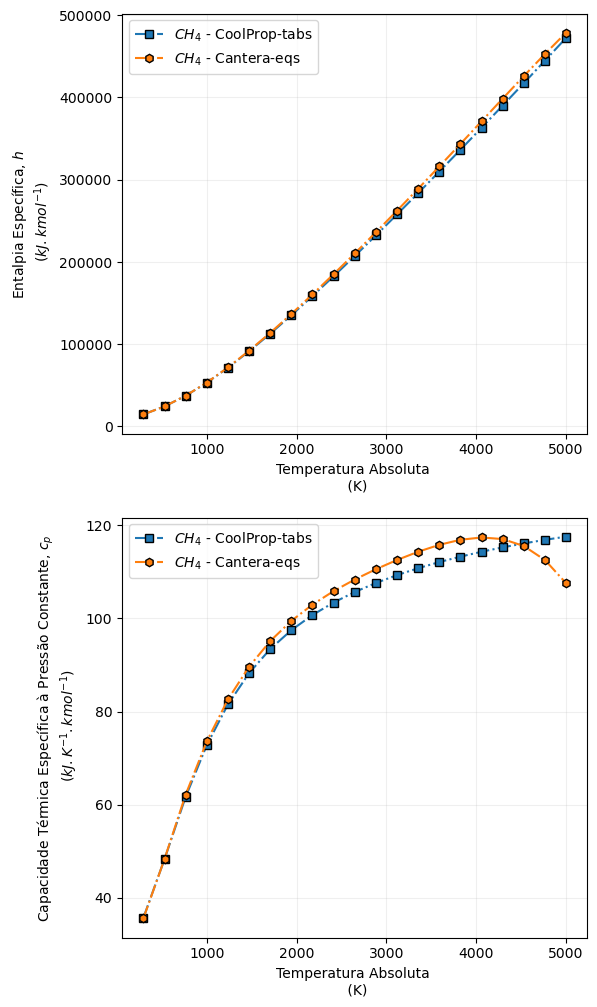

In [6]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.style.use('grayscale')
from CoolProp.CoolProp import PropsSI

#número de pontos para análise
n_points = 21

temps_kelvin = np.linspace(20,4726.85,n_points, dtype=np.float64) + 273.15

# Dados tabelados via CoolProp
entalp_coolp = PropsSI("HMOLAR", 'P', 101325, 'T', temps_kelvin, "CH4")
cp_coolp = PropsSI("CPMOLAR", 'P', 101325, 'T', temps_kelvin, "CH4")

# Abordagem equações de estado via Cantera
entalp_cantera = np.empty_like(temps_kelvin, dtype=np.float64)
cp_cantera = np.empty_like(temps_kelvin, dtype=np.float64)
gas = ct.Solution('gri30.yaml')
gas.X = "CH4:1"
for i, t in np.ndenumerate(temps_kelvin):
    gas.TP = t, 101325
    entalp_cantera[i[0]] = gas.enthalpy_mole/1000
    cp_cantera[i[0]] = gas.cp_mole/1000

fig, axs = plt.subplots(2,1, figsize=(6,12), facecolor='white')

correct = entalp_coolp[0] - entalp_cantera[0]
axs[0].grid(which='both', alpha=.2)
axs[0].plot(temps_kelvin, entalp_coolp, 's-.', markeredgecolor = 'k', label="$CH_4$ - CoolProp-tabs")
axs[0].plot(temps_kelvin,(entalp_cantera+correct),  'h-.', markeredgecolor = 'k', label="$CH_4$ - Cantera-eqs")
axs[0].set_ylabel("Entalpia Específica, $h$ \n ($kJ.kmol^{-1}$)")
axs[0].set_xlabel("Temperatura Absoluta \n (K)")
axs[0].legend()

axs[1].grid(which='both', alpha=.2)
axs[1].plot(temps_kelvin, cp_coolp, 's-.', markeredgecolor = 'k',  label="$CH_4$ - CoolProp-tabs")
axs[1].plot(temps_kelvin, cp_cantera, 'h-.', markeredgecolor = 'k',  label="$CH_4$ - Cantera-eqs")
axs[1].set_xlabel("Temperatura Absoluta \n (K)")
axs[1].set_ylabel("Capacidade Térmica Específica à Pressão Constante, $c_p$ \n ($kJ.K^{-1}.kmol^{-1}$)")
axs[1].legend()
plt.show()